In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [6]:
import sklearn
from sklearn.cluster import DBSCAN
from scipy.spatial import distance

In [16]:


days = [90,60,45,30,15]

for DAYS in days:

    TRIALS = 1000000
    fp = 0
    T = 0
    U1 = np.random.binomial(1, 0.3, DAYS)
    for i in range(TRIALS):
        U2 = np.random.binomial(1, 0.3, DAYS)
        data = np.array([U1,U2], bool)
    
        t0 = time.time()
        data = sklearn.metrics.pairwise_distances(data, metric='jaccard')
        t1 = time.time()
    
        d = data[0,1]
        if d < 0.3: fp += 1
        
        total = t1-t0
        T += total 
    print(DAYS, ': ', fp, T)

90 :  0 143.67716026306152
60 :  0 118.18086886405945
45 :  0 103.20779514312744
30 :  16 101.24320101737976
15 :  2306 114.03707075119019


In [24]:
for i in range(1):

    TRIALS = 10,000,000
    fp = 0
    T = 0
    U1 = np.random.binomial(1, 0.3, 60)
    for i in range(TRIALS):
        U2 = np.random.binomial(1, 0.3, 60)
        data = np.array([U1,U2], bool)
        t0 = time.time()
        data = sklearn.metrics.pairwise_distances(data, metric='jaccard')
        t1 = time.time()
        d = data[0,1]
        if d < 0.3: fp += 1
        total = t1-t0
        T += total 
        
        if fp == 1: break
        
    print(DAYS, ': ', fp, T)

15 :  0 1339.970606803894


In [19]:
def cluster(dist, ep, ms):
    clustering = DBSCAN(eps=ep, min_samples=ms, metric='precomputed').fit(dist)
    L = clustering.labels_
    return L

In [23]:
users = [1024,2048,4096,8192, 16384]

for u in users:
    data = []
    for i in range(u):
        data.append(np.random.binomial(1, 0.3, 60))
    data = np.array(data, bool)
    
    
    t0 = time.time()
    dist = sklearn.metrics.pairwise_distances(data, metric='jaccard')
    ls = cluster(dist, 0.29, 5)
    labels = np.array(ls) + 1
    N = np.max(labels)
    t1 = time.time()
    T = t1 - t0
    print(u, N, T)

1024 0 0.12356424331665039
2048 0 0.5218942165374756
4096 0 2.5947868824005127
8192 0 7.470322847366333
16384 0 41.51579761505127


In [ ]:
results = []
U1 = np.random.binomial(1, 0.5, 90)
T = 0
fp = 0
for i in range(1000000):


In [2]:
import re 
def has_cyrillic(text):
    return bool(re.search('[а-яА-Я]', text))

In [3]:
# Imports the Google Cloud client library
from google.cloud import translate
def trans(input_text):
    
    translated = False
    
    if has_cyrillic(input_text) == True:
        # Instantiates a client
        translate_client = translate.Client()

        # The text to translate
        text = input_text
        # The target language
        target = 'en'

        translation = translate_client.translate(
            text,
            target_language=target)
    
#        print('Text: {}'.format(text))
#        print('Translation: {}'.format(translation['translatedText']))
    
        x = format(translation['translatedText'])
        translated = True
    else: x = input_text
        
    return x, translated

In [4]:
print(trans('Привет, мир'))

('Hello World', True)


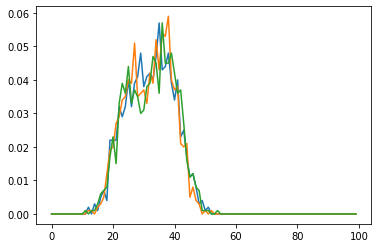

In [5]:
p = 0.4
q = 0.25
e = 0.6
users = 100

for k in range(3):
    events = np.random.binomial(1, e, 1000)
    data = []
    for i in range(1000):
        event = events[i]
        if event == 0:
            posts = np.random.binomial(users, q, 1)
        else:
            posts = 0
            prob = p
            for j in range(users):
                x = np.random.uniform(0.7,0.9)
                posts += np.random.binomial(1, x * p + (1-x) * q, 1)
        data.append(posts)    
    
    ocs = []
    for i in range(users):
        ocs.append(data.count(i))
    plt.plot(np.array(ocs) / 1000)

In [6]:
dist = np.zeros(1000)
users = 0
for i in range(10):
    p = np.random.uniform() ** 2
    n = np.random.uniform()
    dist += np.array(np.random.binomial(1, p, 1000), float) * 30 * n
    users += 30 * n

pct_act = dist / users
print(pct_act[0:10])

samples = pct_act
samples = list(samples * 100)

for i in range(len(samples)):
    samples[i] = int(samples[i])

print(samples[0:10])

occurences = np.zeros(101,int)
for i in range(101):
    occurences[i] = samples.count(i)

plt.plot(occurences / days)

[0.16653849 0.20448913 0.18687802 0.48005377 0.47430852 0.37968495
 0.33686655 0.13237742 0.         0.52754796]
[16, 20, 18, 48, 47, 37, 33, 13, 0, 52]


NameError: name 'days' is not defined

In [8]:
import sklearn
from sklearn.cluster import DBSCAN
from scipy.spatial import distance

In [ ]:
NUM = 15
targets = np.zeros(NUM,int)
for i in range(NUM):
    targets[i] = 2**(i+1)
print(np.max(targets))

In [18]:
results = []
U1 = np.random.binomial(1, 0.5, 90)
T = 0
fp = 0
for i in range(1000000):
    U2 = np.random.binomial(1, 0.3, 90)
    data = np.array([U1,U2], bool)
    
    t0 = time.time()
    data = sklearn.metrics.pairwise_distances(data, metric='jaccard')
    t1 = time.time()
    
    d = data[0,1]
    
    if d < 0.25: fp += 1
    
    total = t1-t0
    T += total

print(T, fp)

91.15501403808594 0


In [29]:
results = []
for target in targets:
    users = target
    data = []
    for i in range(users):
        row = np.random.binomial(1, 0.5, 1000)
        data.append(row)
    data = np.array(data)
    t0 = time.time()
    data = sklearn.metrics.pairwise_distances(data, metric='jaccard')
    t1 = time.time()
    total = t1-t0
    print(users, total)
    results.append([users,total])

C:\Users\macki\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\macki\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\macki\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\macki\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\macki\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\macki\Anaconda3\lib\site-p

2 0.0368962287902832
4 0.0009970664978027344
8 0.0010128021240234375
16 0.0009915828704833984
32 0.0029764175415039062
64 0.004034519195556641
128 0.01889634132385254
256 0.061823129653930664
512 0.2881450653076172


C:\Users\macki\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


1024 1.0410704612731934


C:\Users\macki\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


2048 4.099458456039429


C:\Users\macki\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


KeyboardInterrupt: 

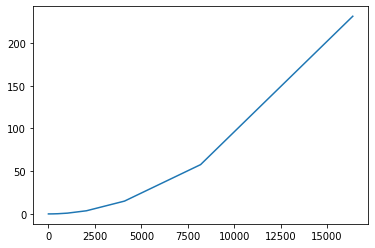

In [28]:
results = np.array(results)
plt.plot(results[:,0],results[:,1])

[0.6  0.3  0.2  0.45 0.25 0.3  0.65 0.55 0.4  0.4 ]
[60, 30, 20, 45, 25, 30, 65, 55, 40, 40]


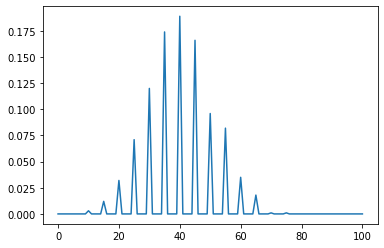

In [29]:
users = 20
days = 1000
dist = np.zeros(1000,int)
for i in range(users):
    data = np.random.binomial(1, 0.4, 1000)
    dist += data
    data = np.random.binomial(1, 0.4, 1000)
    data[0:500] = 0
    dist += data
    
pct_act = dist / (users)
print(pct_act[0:10])

samples = pct_act
samples = list(samples * 100)

for i in range(len(samples)):
    samples[i] = int(samples[i])

print(samples[0:10])

occurences = np.zeros(101,int)
for i in range(101):
    occurences[i] = samples.count(i)

plt.plot(occurences / days)

In [86]:
data1 = np.random.binomial(100, 0.3, 45)
data2 = np.random.binomial(100, 0.5, 30)
data3 = np.random.binomial(100, 0.7, 45)

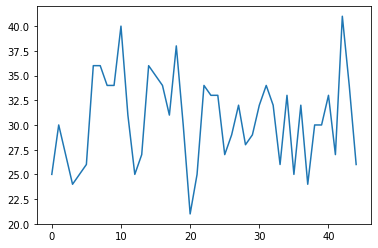

In [87]:
plt.plot(data1)

In [88]:
import random
from scipy.stats import binom

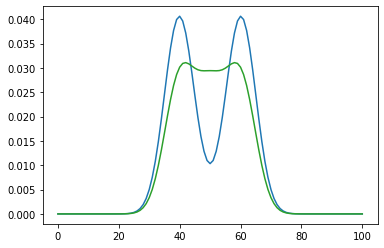

In [96]:
p = [0.4,0.5,0.6]
y0 = binom.pmf(x, 100, p[0])
y1 = binom.pmf(x, 100, p[1])
y2 = binom.pmf(x, 100, p[2])

plt.plot( (y0 + y2) / 2 )
plt.plot(0)
plt.plot( (y0 + y2 + 0.85 * y1) / 3 )

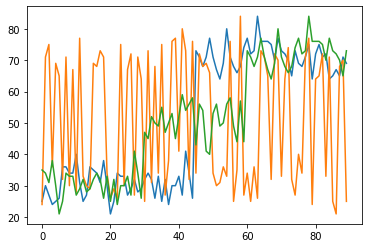

In [97]:
data = list(data1) + list(data3)
plt.plot(data)

random.shuffle(data)
plt.plot(data)
#plt.show()

data = list(data1[15:]) + list(data2) + list(data3[:30])
plt.plot(data)
plt.show()

0.298091042748747


In [179]:
def cpair(k, v, M = True):
    d = np.zeros(k)
    
    x = np.random.uniform()
    if M != True:
        if x < 0.5: x = v[0]
        else: x = v[1]
    
    for j in range(k):
        y = np.random.uniform()
        if y < x: b = 1
        else: b = 0
        d[j] = b
    return d

0.8115770761519467
0.8125040620380232
0.8116303551051864
0.8102035261051885
0.8095008712412644
0.8123781293259349
0.8116654094311871
0.8122426071202177
0.8103235022420404
0.8141018690436553
0.81298848450834
0.810837679299648
0.8116567868525186
0.8120541899789739
0.8131389313926501
0.8113766704267229
0.8117735280245357
0.8128271337124785
0.8120557861772902
0.813617206809576
0.8119121461569644
0.8127262513782859
0.8099413822081251
0.8099264003090181
0.8130456845640823
0.8117982847810412
0.8111166196359257
0.812725423976621
0.8108509172692978
0.8132931784815777
0.8128156615460788
0.8113925103028526
0.8113140619753255
0.8128388009725748
0.8104784262166375
0.8121435866789221
0.8109565413857786
0.8121018723627993
0.8110769089940488
0.8136231999006224
0.8127058465248601
0.81263518357948
0.8104689269809435
0.8151711170945657
0.8112238896403664
0.8112179352632516
0.8121352779281283
0.8114205343961443
0.8093654720303853
0.8101438210356477


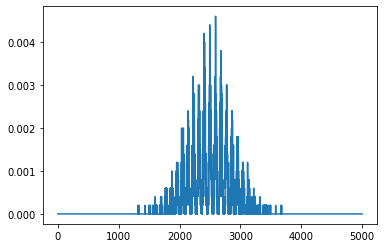

In [259]:
N = 100
D = 5000
Total = np.zeros((D), int)
K = 1

for J in range(50):
    data = np.zeros((N,D), int)
    for i in range(D):
#    print()
        data[:,i] = cpair(N, (0.05,0.95), False)    
    j = np.sum(data,0)
    Total += j
    j = list(j)
    T = list(Total)
    print(np.mean(np.corrcoef(data)))
    dist = []
    for i in range(101):
        True
#        dist.append(j.count(i))
#    plt.plot(np.array(dist) / 5000)

distT = []
for i in range(100 * (J + 1) + 1):
    distT.append(T.count(i))
plt.plot(np.array(distT) / 5000)

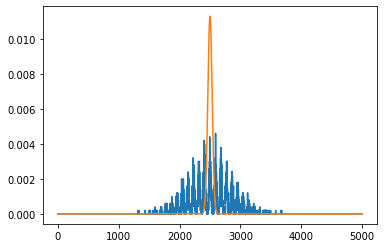

In [263]:
plt.plot(np.array(distT) / (5000))
y0 = binom.pmf(range(5000), 5000, 0.5)
plt.plot(y0)

0.8850966959052042
0.3371900653440503
0.010333867330896513
0.25865788374054394
0.050766156299837696


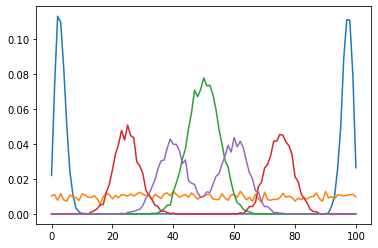

In [195]:
N = 100
D = 5000
data = np.zeros((N,D))
for i in range(D):
#    print()
    data[:,i] = cpair(N, (0.03,0.97), False)
    
j = np.sum(data,0)
j = list(j)
#plt.plot(j)

print(np.mean(np.corrcoef(data)))
dist = []
for i in range(101):
    dist.append(j.count(i))
plt.plot(np.array(dist) / 5000)

data = np.zeros((N,D))
for i in range(D):
#    print()
    data[:,i] = cpair(N, (0.03,0.97), True)
    
j = np.sum(data,0)
j = list(j)
#plt.plot(j)

print(np.mean(np.corrcoef(data)))
dist = []
for i in range(101):
    dist.append(j.count(i))
plt.plot(np.array(dist) / 5000)

data = np.zeros((N,D))
for i in range(D):
#    print()
    data[:,i] = cpair(N, (0.5,0.5), False)
j = np.sum(data,0)
j = list(j)
#plt.plot(j)
print(np.mean(np.corrcoef(data)))
dist = []
for i in range(101):
    dist.append(j.count(i))
plt.plot(np.array(dist) / 5000)

data = np.zeros((N,D))
for i in range(D):
#    print()
    data[:,i] = cpair(N, (0.25,0.75), False)
j = np.sum(data,0)
j = list(j)
#plt.plot(j)
print(np.mean(np.corrcoef(data)))
dist = []
for i in range(101):
    dist.append(j.count(i))
plt.plot(np.array(dist) / 5000)

data = np.zeros((N,D))
for i in range(D):
#    print()
    data[:,i] = cpair(N, (0.4,0.6), False)
j = np.sum(data,0)
j = list(j)
#plt.plot(j)
print(np.mean(np.corrcoef(data)))
dist = []
for i in range(101):
    dist.append(j.count(i))
plt.plot(np.array(dist) / 5000)

In [200]:
obs = []
for i in np.linspace(0,1,101):
    obs.append(np.random.binomial(1,i))

In [201]:
print(obs)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
